In [5]:
import sys
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from torchvision.transforms import ToTensor

current_dir = Path(os.getcwd())
project_root = current_dir.parent
sys.path.append(str(project_root))
from src.train.model import Generator

device = "cuda" if torch.cuda.is_available() else "cpu"

model = Generator(upscale_factor=2).to(device)
ckpt_path = project_root / "outputs" / "checkpoints" / "checkpoint_epoch_35.pth"
checkpoint = torch.load(ckpt_path, map_location=device)
model.load_state_dict(checkpoint['G_state'] if 'G_state' in checkpoint else checkpoint)
model.eval()

Generator(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (prelu): PReLU(num_parameters=1)
  (res_blocks): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (prelu): PReLU(num_parameters=1)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (prelu): PReLU(num_parameters=1)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Residua

In [6]:
def upscale_image(image_path, save_path=None):
    img = Image.open(image_path).convert("RGB")
    
    img_t = ToTensor()(img).unsqueeze(0).to(device)
    img_t = img_t * 2 - 1
    
    with torch.no_grad():
        sr_t = model(img_t)
        
    sr_t = (sr_t.squeeze(0).cpu().clamp(-1, 1) + 1) / 2
    sr_img = Image.fromarray((sr_t.permute(1, 2, 0).numpy() * 255).astype(np.uint8))
    
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original ({img.size})")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(sr_img)
    plt.title(f"SRGAN Upscaled ({sr_img.size})")
    plt.axis('off')
    plt.show()

    if save_path:
        sr_img.save(save_path)
        print(f"Saved: {save_path}")

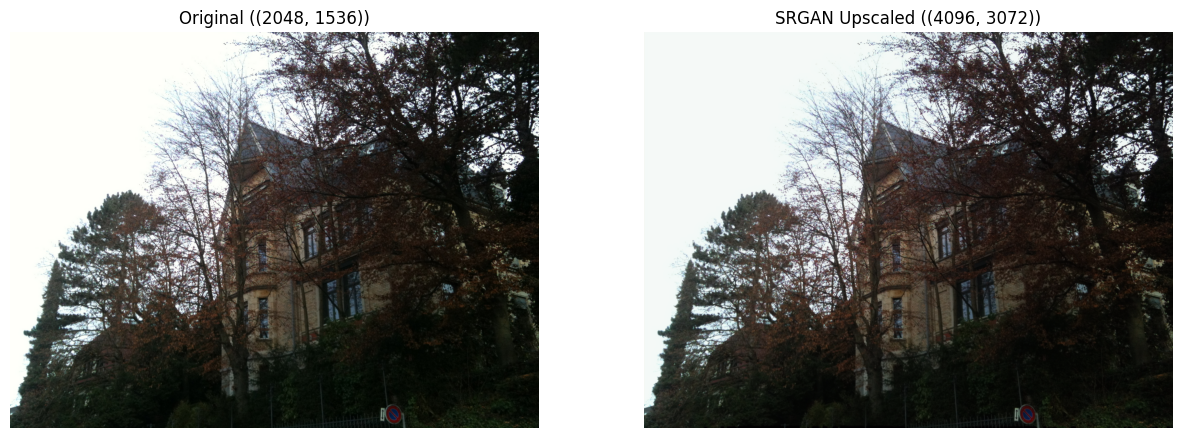

Saved: d:\PROYEK ML DAN AI\srgan-div2k\outputs\test_results\upscaled_result.jpg


In [12]:
input_path = project_root / "data" / "custom" / "iphone" / "68.jpg"
output_path = project_root / "outputs" / "test_results" / "upscaled_result.jpg"

output_path.parent.mkdir(parents=True, exist_ok=True)

if input_path.exists():
    upscale_image(input_path, output_path)
else:
    print(f"File not found: {input_path}")